In [12]:
# -*- coding: utf-8 -*-
import numpy as np
from scipy.optimize import leastsq
import matplotlib as mpl
import matplotlib.pyplot as plt
# 设置 FangSong/黑体
mpl.rcParams['font.sans-serif'] = [u'SimHei']
# 解决 负号 的显示问题
mpl.rcParams['axes.unicode_minus'] = False

真实参数:	 [10, 0.34, 0.5235987755982988]
拟合参数:	 [-10.09081595   0.3441005    3.73925273]


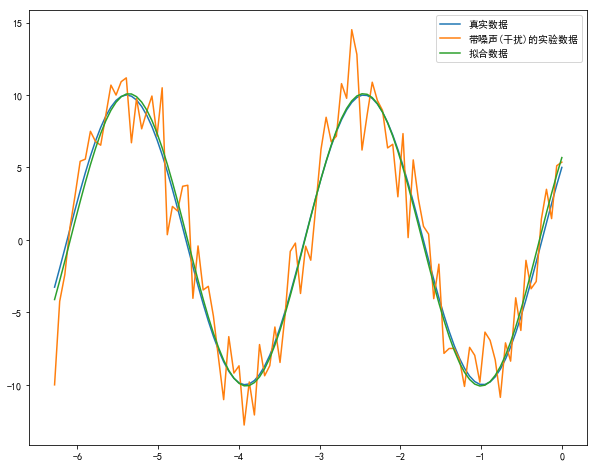

In [16]:
# http://old.sebug.net/paper/books/scipydoc/scipy_intro.html
'''
要拟合的函数是一个正弦波函数，它有三个参数 A, k, theta ，分别对应振幅、频率、相角。
假设我们的实验数据是一组包含噪声的数据 x, y1，其中y1是在真实数据y0的基础上加入噪声的到了
'''
# 最小二乘拟合
# S(\mathbf{p}) = \sum_{i=1}^m [y_i - f(x_i, \mathbf{p}) ]^2
def func(c, p):
    '''
    数据拟合所用的函数：A * sin(2 * pi * k * x + theta)
    '''
    A, k, theta = p
    return A * np.sin(2 * np.pi * k * x + theta)
def residuals(p, y, x):
    '''
    实验数据x, y和拟合函数之间的查，p 为拟合需要找到的系数
    '''
    return y - func(x, p)
x = np.linspace(0, -2 * np.pi, 100)
# 真实数据的函数参数
A, k, theta = 10, 0.34, np.pi / 6 
# 真实数据
y_0 = func(x, [A, k, theta])
# 加入噪声(干扰)之后的实验数据
y_1 = y_0 + 2 * np.random.randn(len(x))

# 第一次猜测的函数拟合参数
p_0 = [7, 0.2, 0]

# 调用leastsq 进行数据拟合
# residuals -> 计算误差的函数
# p_0 -> 拟合参数的初始值
# args -> 需要拟合的实验数据
plsq = leastsq(residuals, p_0, args=(y_1, x))

print(u'真实参数:\t %s' % ([A, k, theta]))
# 实验数据拟合后的参数
print(u'拟合参数:\t %s' % plsq[0])

# 设置尺寸
plt.figure(figsize=(10,8))
plt.plot(x, y_0, label=u'真实数据')
plt.plot(x, y_1, label=u'带噪声(干扰)的实验数据')
plt.plot(x, func(x, plsq[0]), label=u'拟合数据')
# 图片的label放在右上角
plt.legend(loc='upper right')
plt.show()